In [6]:
!pip install -r requirements.txt

Looking in indexes: https://repo.mamdev.server.lan/artifactory/api/pypi/pypi-mam/simple, https://pypi.python.org/simple
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c2/da/a5622266952ab05dc3995d77689cba600e49ea9d6c51d469c077695cb719/matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/aa/55/02c6d24804592b862b38a85c9b3283edc245081390a520ccd11697b6b24f/contourpy-1.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/87/61/f50ab3237b0cbf2b0be12274227f912d30f94e2b93fb8bae92c91107eee8/fonttools-4.42.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 9.1 MB/s eta

In [7]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [9]:
train_dataset = torchvision.datasets.MNIST(
    root="./MNIST/train", train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True)

In [10]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64)

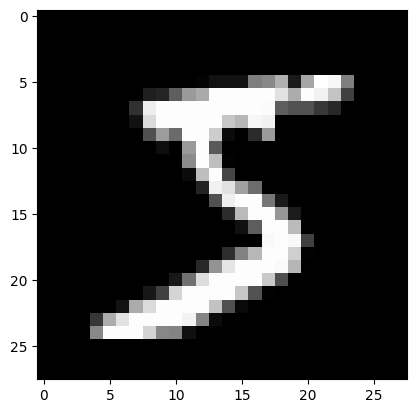

In [16]:
plt.imshow(train_dataset[0][0][0].numpy(), cmap='gray')

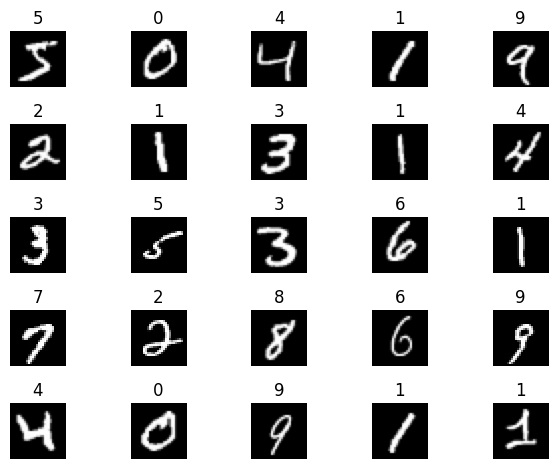

In [18]:
for idx in range(25):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
    plt.title(train_dataset[idx][1])
    plt.axis('off')
  
plt.tight_layout()
plt.show()